<a href="https://colab.research.google.com/github/douglassesi/MachineLearning/blob/main/Classifica%C3%A7%C3%A3o/Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivo
Classificação de animais por suas características

#Import das bibliotecas

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#Carregando o arquivo Zoo

In [2]:
!git clone https://github.com/douglassesi/MachineLearning

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


In [3]:
os.chdir("/content/MachineLearning/Classificação/src")

In [4]:
filename = 'zoo.csv'

df_zoo=  pd.read_csv(filename,engine="python", sep=",")
df_zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


##Pré-análise

In [5]:
np.unique(df_zoo.class_type)

array([1, 2, 3, 4, 5, 6, 7])

In [6]:
df_zoo.isnull().sum()


animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

#Pré-processamento

###Reordenando as colunas para facilitar a manipulação

In [7]:
df_zoo = df_zoo[['class_type','animal_name','legs','hair','feathers',
                   'eggs','milk','airborne','aquatic','predator',
                   'toothed',	'backbone','breathes','venomous','fins','tail','domestic','catsize']]

##Separação das features

###Features

In [8]:
X = df_zoo.iloc[:,2:].values
X

array([[4, 1, 0, ..., 0, 0, 1],
       [4, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [4, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 1, ..., 1, 0, 0]])

###Target

Objetivo: Identificar a classe do animal

In [9]:
y = df_zoo.iloc[:,0].values
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

##Separação da massa de Treino e Teste

* Treino (70%) = X_train, y_train
* Teste (30%) = X_teste, y_test



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=30)

#Processamento

##Árvore de Decisão

###Preparando o Pipeline

In [11]:
std_slc = StandardScaler()

In [42]:
classif_tree = DecisionTreeClassifier()

In [43]:
pipe_tree = Pipeline(steps=[('std_slc', std_slc),
                       ('classif_tree', classif_tree)])

###Preparando os parâmetros para Gridsearch

In [44]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
random_state = [32,42]

In [45]:
parameters_tree = dict(classif_tree__criterion=criterion,
                  classif_tree__max_depth=max_depth,
                  classif_tree__random_state=random_state)

In [53]:
tree_GS = GridSearchCV(pipe_tree, parameters_tree)
tree_model = tree_GS.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [54]:
print('Best Criterion:', tree_model.best_estimator_.get_params()['classif_tree__criterion'])
print('Best max_depth:', tree_model.best_estimator_.get_params()['classif_tree__max_depth'])
print('Best random_state', tree_model.best_estimator_.get_params()['classif_tree__random_state'])

Best Criterion: entropy
Best max_depth: 4
Best random_state 42


In [55]:
y_pred_tree = tree_model.predict(X_test)
cm_tree = confusion_matrix(y_test,y_pred_tree)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.33      1.00      0.50         1

    accuracy                           0.87        31
   macro avg       0.60      0.62      0.56        31
weighted avg       0.89      0.87      0.86        31

0.8709677419354839


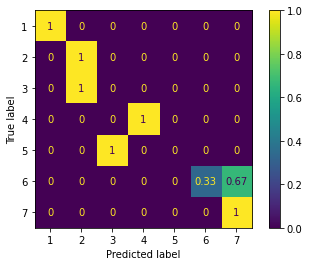

In [56]:
plot_confusion_matrix(tree_model, X_test, y_test, normalize = 'true')
print(classification_report(y_test,y_pred_tree))
print(metrics.accuracy_score(y_test,y_pred_tree))

##XGboost

###Preparando o Pipeline

In [57]:
classif_xg = XGBClassifier()

In [58]:
pipe_xg = Pipeline(steps=[('std_slc', std_slc),
                       ('classif_xg', classif_xg)])

In [59]:
learning_rate = [0.001,0.01,0.1]

In [60]:
parameters_xg = dict(classif_xg__max_depth=max_depth,
                  classif_xg__learning_rate=learning_rate,
                  classif_xg__random_state=random_state)

In [68]:
xg_GS = GridSearchCV(pipe_xg, parameters_xg)
xg_model = xg_GS.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [69]:
print(xg_model.best_estimator_)

Pipeline(memory=None,
         steps=[('std_slc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classif_xg',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=32,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)


In [70]:
y_pred_xg = xg_model.predict(X_test)
cm_xg = confusion_matrix(y_test,y_pred_xg)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         3
           7       0.33      1.00      0.50         1

    accuracy                           0.94        31
   macro avg       0.90      0.90      0.86        31
weighted avg       0.98      0.94      0.94        31

0.9354838709677419


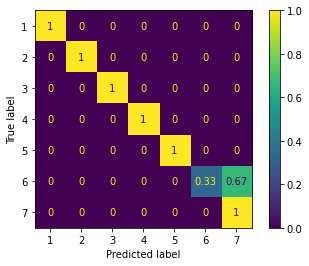

In [71]:
plot_confusion_matrix(xg_model, X_test, y_test, normalize = 'true')
print(classification_report(y_test,y_pred_xg))
print(metrics.accuracy_score(y_test,y_pred_xg))

##Aplicação do modelo de KNN

###Identificação do valor de K

Text(0, 0.5, 'Testing Accuracy')

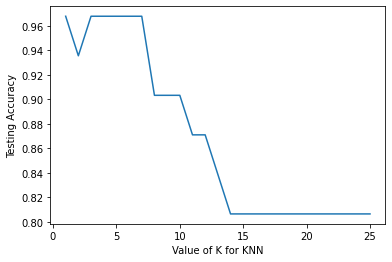

In [73]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_KNN))

#print(scores)
#Plota os valores de acc. em função do valor escolhido de K
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

###Aplicação para k = 7

In [74]:
Classif_KNN = KNeighborsClassifier(n_neighbors=7)

In [75]:
Classif_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [77]:
y_pred_KNN = Classif_KNN.predict(X_test)

###Análise do Resultado pela Matriz de Confusão

In [78]:
cm_KNN= confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.97        31
   macro avg       0.85      0.86      0.85        31
weighted avg       0.94      0.97      0.95        31

0.967741935483871


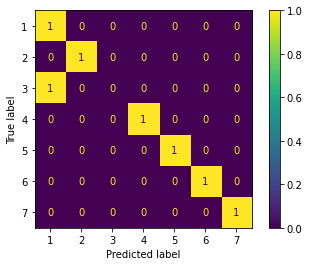

In [79]:
plot_confusion_matrix(Classif_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))